In [2]:
import numpy as np
import pandas as pd



### Загружаем датасет из собственного репозитория github и смотрим качество датасета

In [3]:
url='https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_12/diabetes.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 1. Примените алгоритм KNN (k-ближайших соседей) для данных по заболеваемости сахарным диабетом

### 1.1 Разбиваем датасет на тестовую и обучающую выборку
столбец 'outcome' является класификатором текущего набора данных, остальные столбцы являются data features для адаптации модели kNN
Объем тестового набора данных - 25% от общего количества

In [4]:
# Разбиваем датасет на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]], df.Outcome, test_size=0.25, random_state=3)


In [6]:
#подключение классификатора KNN
from sklearn.neighbors import KNeighborsClassifier

# определяем точность обучения модели по данному алгориитму для различного количества 'k'
n_neighbors=np.array([5, 10, 15, 20, 25])
score_arr=[0, 0, 0, 0, 0]

for i in range(len(n_neighbors)):
  model = KNeighborsClassifier(n_neighbors = n_neighbors[i])
  model.fit(x_train,y_train)

  score_arr[i] = model.score(x_test,y_test)*100

# print(score_arr)
score=np.array(score_arr)

df_sn = pd.DataFrame({'neighbors': n_neighbors, 'score': score})
df_sn

,neighbors,score
0,5,68.229167
1,10,70.312500
2,15,71.354167
3,20,66.666667
4,25,65.625000


### 1.2 Строим визуализацию обученной классификации для указанных k

(50.0, 80.0)

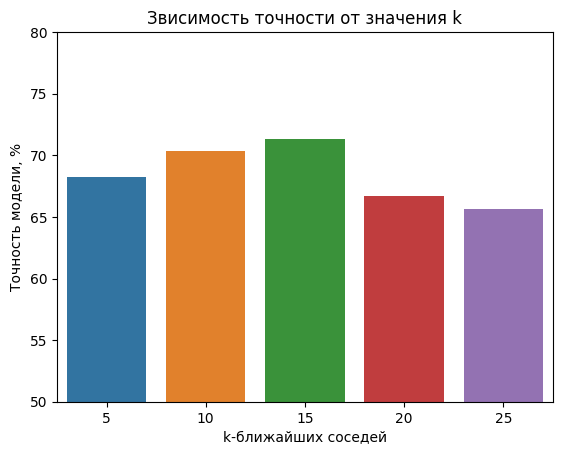

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='neighbors', y ='score', data=df_sn, errorbar=None)

plt.title('Звисимость точности от значения k')
plt.ylabel('Точность модели, %')
plt.xlabel('k-ближайших соседей')
plt.ylim(50,80)

## 2. Постройте модель множественной линейной регрессии для атрибутов X ={SkinThickness, BMI} и Y = {Insulin} из датасета предыдущего задания. Укажите score модели и предоставьте значения b, a1, a2 формулы: y = b + a1*x1 + a2*x2

In [8]:
# Делаем выборку из датафрейма для X
# инициализируем X (data feature) целевой функции "Insulin"
X=df[['SkinThickness', 'BMI']]
X

,SkinThickness,BMI
0,35,33.6
1,29,26.6
2,0,23.3
3,23,28.1
4,35,43.1
...,...,...
763,48,32.9
764,27,36.8
765,23,26.2
766,0,30.1


In [9]:
y = df['Insulin']
y

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression
# разбиваем dataset на test / train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

# инициализируем model как линейную регрессию
model_L = LinearRegression()
model_L.fit(X_train, y_train)


LinearRegression()

In [11]:
# получаем метрику качества модели на test выборке
model_L.score(X_test,y_test)
# Предсказание получилось ужасное - как будто они совсем не коррелируют.



0.32756697628128906

In [12]:
# печатаем полученные коэффициенты для множественной линейной регрессии
print("Параметры:", model_L.coef_, model_L.intercept_)
print("Коэффициент a1 из формулы y=b+a1x1+a2x2:", model_L.coef_[0])
print("Коэффициент a2 из формулы y=b+a1x1+a2x2:", model_L.coef_[1])
print("Коэффициент b из формулы y=b+a1x1+a2x2::", model_L.intercept_)

Параметры: [3.04168508 0.44334635] 5.852762283574307
Коэффициент a1 из формулы y=b+a1x1+a2x2: 3.041685076695189
Коэффициент a2 из формулы y=b+a1x1+a2x2: 0.44334635108910697
Коэффициент b из формулы y=b+a1x1+a2x2:: 5.852762283574307


##3. Примените к указанным данным любую одну модель (решите сами - для задачи классификации или задачи регрессии)
- SVM
- DecisionTree
- Полиномиальная регрессия

Выбираем SVM - задача класификации

In [33]:
X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
y = df.Outcome
# делим модель на тестовую и обучающую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)



from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
model_S = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", svm.SVC(kernel='linear',C = 1.0)),
    ])
# обучаем модель и смотрим точность
model_S.fit(X_train, y_train)
model_S.score(X_test,y_test)



0.7597402597402597

In [34]:
# предсказание
model_S.predict([[1,85,66,29,0,26.6,0.351,31]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])